In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import dataframe_image as dfimg
from Perceptron2 import Perceptron


In [2]:
df = pd.read_csv('input\weatherHistory.csv')
df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Preprocess

In [7]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce')
df['dayOfYear'] = df['Formatted Date'].dt.day_of_year

daily_avg = df.groupby("dayOfYear")["Temperature (C)"].mean().reset_index()
daily_avg
        
# dfimg.export(daily_avg, 'output/temp_per_day.png', max_rows=10)


,dayOfYear,Temperature (C)
0,84.0,8.801852
1,85.0,11.443013
2,86.0,10.258602
3,87.0,9.768800
4,88.0,10.213919
...,...,...
216,300.0,10.437259
217,301.0,9.243180
218,302.0,6.407051
219,303.0,6.856536


Text(0, 0.5, 'mean Temperature(C)')

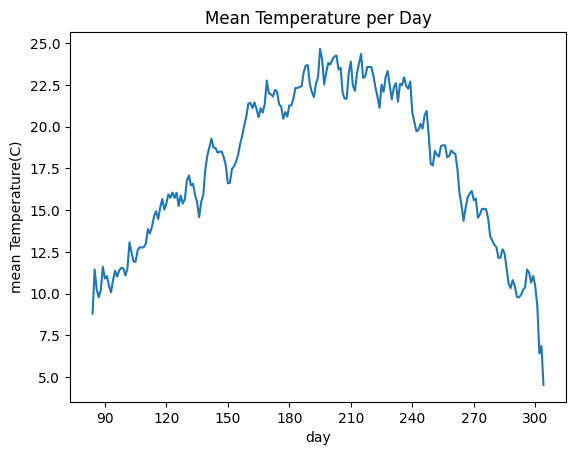

In [8]:
plt.plot(daily_avg['dayOfYear'], daily_avg['Temperature (C)'])
plt.title('Mean Temperature per Day')
plt.xticks([90,120,150,180,210,240,270,300])
plt.xlabel('day')
plt.ylabel('mean Temperature(C)')
# plt.savefig('output/mean_temp_per_day.png')

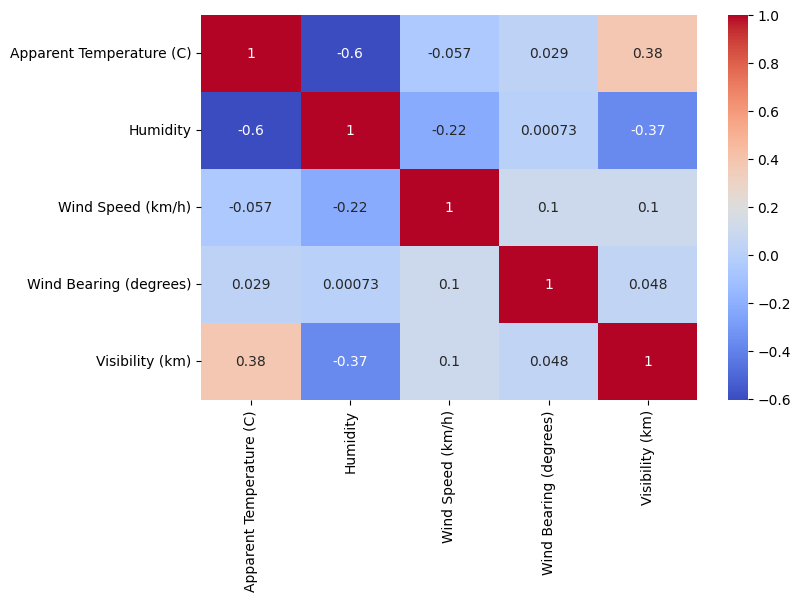

In [9]:
import seaborn as sns
correlation = df[['Apparent Temperature (C)','Humidity', 'Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)']].corr()

plt.figure(figsize=(8,5))
sns.heatmap(correlation,annot=True, cmap='coolwarm')
plt.show()

In [19]:
X = df[['Humidity','Visibility (km)']].values
y = df['Temperature (C)'].values

# scaler_X = StandardScaler()
# scaler_y = StandardScaler()

# X_scaled = scaler_X.fit_transform(X)
# y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
epochs = 200

100%|██████████| 200/200 [00:44<00:00,  4.53it/s]


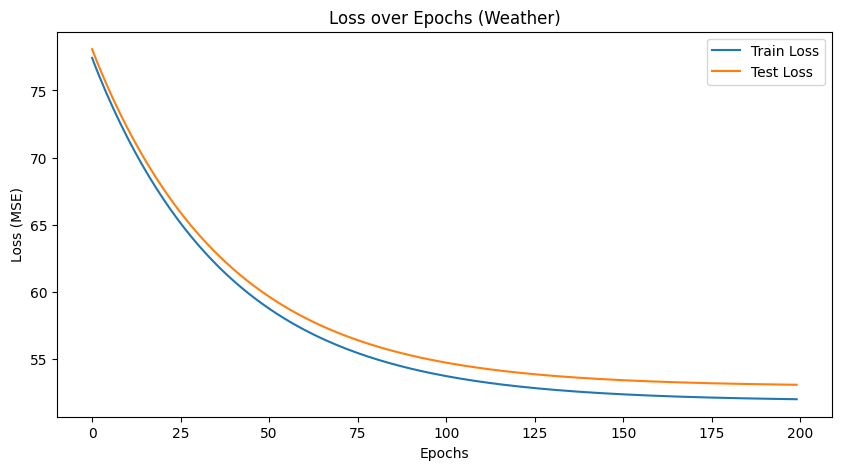

In [ ]:
model = Perceptron(learning_rate=0.00001, input_length=X_train.shape[1])
model.fit(X_train, y_train, X_test, y_test, epochs, function='linear')

In [ ]:
model.evaluate(X_test,y_test)

{'MSE': 53.0735135583146, 'MAE': 5.92119708975179}

In [16]:
model.predict2(X_test,304)

5.6562715959463326